In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
# Let's import the car_sales dataset
car_sales = pd.read_csv("car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [4]:
# Start with some dummy data
ts = pd.Series(np.random.randn(1000),
               index=pd.date_range('1/1/2020', periods=1000))
ts

2020-01-01   -1.022904
2020-01-02    0.689221
2020-01-03   -0.507842
2020-01-04    1.342740
2020-01-05   -0.995675
                ...   
2022-09-22   -0.598321
2022-09-23   -0.112463
2022-09-24   -0.579903
2022-09-25   -2.306316
2022-09-26   -0.535139
Freq: D, Length: 1000, dtype: float64

In [5]:
# What does cumsum() do?
ts.cumsum()

2020-01-01    -1.022904
2020-01-02    -0.333684
2020-01-03    -0.841526
2020-01-04     0.501214
2020-01-05    -0.494461
                ...    
2022-09-22   -52.751237
2022-09-23   -52.863700
2022-09-24   -53.443603
2022-09-25   -55.749919
2022-09-26   -56.285058
Freq: D, Length: 1000, dtype: float64

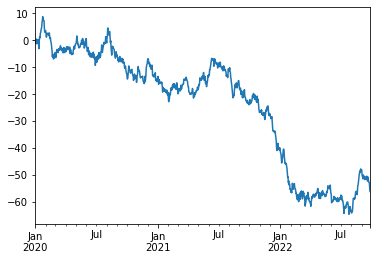

In [6]:
ts.cumsum().plot();

In [7]:

# Remove price column symbols
car_sales["Price"] = car_sales["Price"].str.replace('[\$\,\.]', '')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [8]:

# Remove last two zeros
car_sales["Price"] = car_sales["Price"].str[:-2]
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [9]:
# Add a date column
car_sales["Sale Date"] = pd.date_range("1/1/2020", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2020-01-01
1,Honda,Red,87899,4,5000,2020-01-02
2,Toyota,Blue,32549,3,7000,2020-01-03
3,BMW,Black,11179,5,22000,2020-01-04
4,Nissan,White,213095,4,3500,2020-01-05
5,Toyota,Green,99213,4,4500,2020-01-06
6,Honda,Blue,45698,4,7500,2020-01-07
7,Honda,Blue,54738,4,7000,2020-01-08
8,Toyota,White,60000,4,6250,2020-01-09
9,Nissan,White,31600,4,9700,2020-01-10


In [10]:

# Make total sales column (doesn't work, adds as string)
#car_sales["Total Sales"] = car_sales["Price"].cumsum()

# Oops... want them as int's not string
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2020-01-01,4000
1,Honda,Red,87899,4,5000,2020-01-02,9000
2,Toyota,Blue,32549,3,7000,2020-01-03,16000
3,BMW,Black,11179,5,22000,2020-01-04,38000
4,Nissan,White,213095,4,3500,2020-01-05,41500
5,Toyota,Green,99213,4,4500,2020-01-06,46000
6,Honda,Blue,45698,4,7500,2020-01-07,53500
7,Honda,Blue,54738,4,7000,2020-01-08,60500
8,Toyota,White,60000,4,6250,2020-01-09,66750
9,Nissan,White,31600,4,9700,2020-01-10,76450


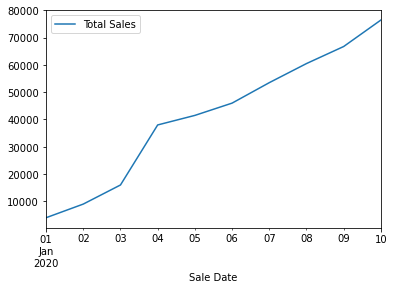

In [11]:
car_sales.plot(x='Sale Date', y='Total Sales');

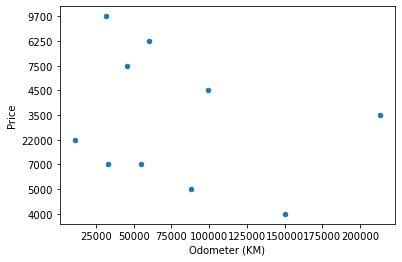

In [12]:

# Doesn't work
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter")

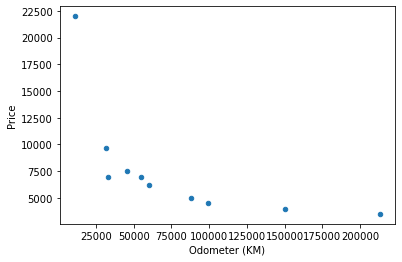

In [13]:

# Convert Price to int
car_sales["Price"] = car_sales["Price"].astype(int)
car_sales.plot(x="Odometer (KM)", y="Price", kind='scatter');

In [14]:

x = np.random.rand(10, 4)
x

array([[0.1019999 , 0.32897601, 0.30873005, 0.30322079],
       [0.77680331, 0.21597   , 0.8504377 , 0.41256195],
       [0.2604104 , 0.11163717, 0.5870003 , 0.8837019 ],
       [0.95674177, 0.87258006, 0.1638218 , 0.80952359],
       [0.64032049, 0.08948964, 0.32516377, 0.3854175 ],
       [0.48086287, 0.16028306, 0.14019362, 0.555138  ],
       [0.87250227, 0.12098342, 0.06660817, 0.55624469],
       [0.76788392, 0.66553989, 0.81923722, 0.82108337],
       [0.41633176, 0.03852734, 0.96398888, 0.79616182],
       [0.71638964, 0.32629472, 0.74793321, 0.2855782 ]])

In [15]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,0.102000,0.328976,0.308730,0.303221
1,0.776803,0.215970,0.850438,0.412562
2,0.260410,0.111637,0.587000,0.883702
3,0.956742,0.872580,0.163822,0.809524
4,0.640320,0.089490,0.325164,0.385418
5,0.480863,0.160283,0.140194,0.555138
6,0.872502,0.120983,0.066608,0.556245
7,0.767884,0.665540,0.819237,0.821083
8,0.416332,0.038527,0.963989,0.796162
9,0.716390,0.326295,0.747933,0.285578


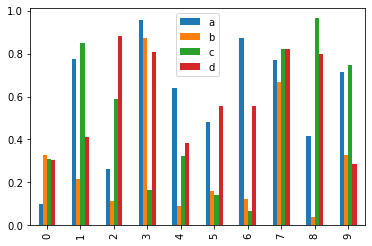

In [16]:

df.plot.bar();

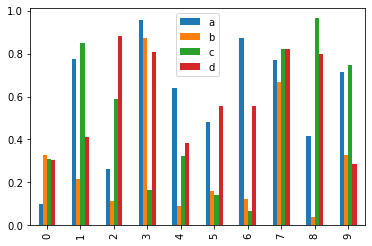

In [17]:

# Can do the same thing with 'kind' keyword
df.plot(kind='bar');

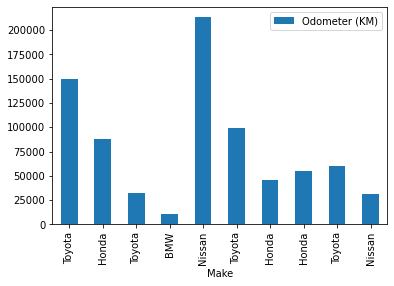

In [18]:

car_sales.plot(x='Make', y='Odometer (KM)', kind='bar');

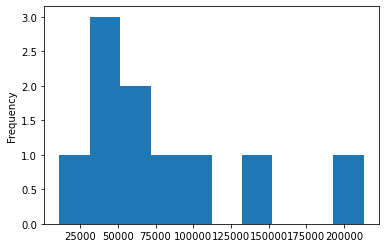

In [19]:

car_sales["Odometer (KM)"].plot.hist();

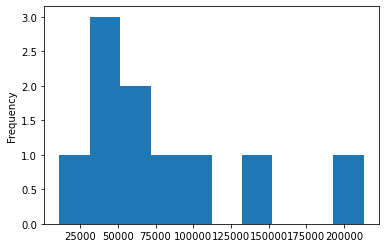

In [20]:

car_sales["Odometer (KM)"].plot(kind="hist");

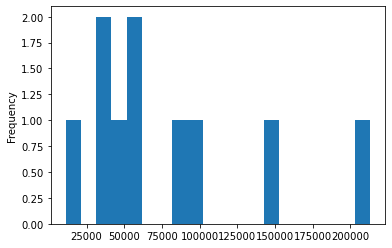

In [21]:
# Default number of bins is 10 
car_sales["Odometer (KM)"].plot.hist(bins=20);

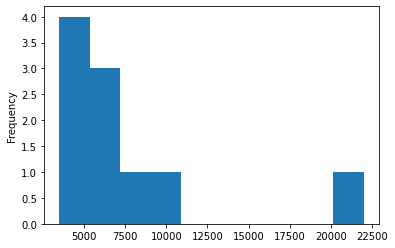

In [22]:
car_sales["Price"].plot.hist(bins=10);

In [24]:
# Let's try with another dataset
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


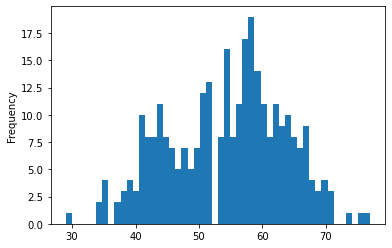

In [25]:

heart_disease["age"].plot.hist(bins=50);

In [26]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


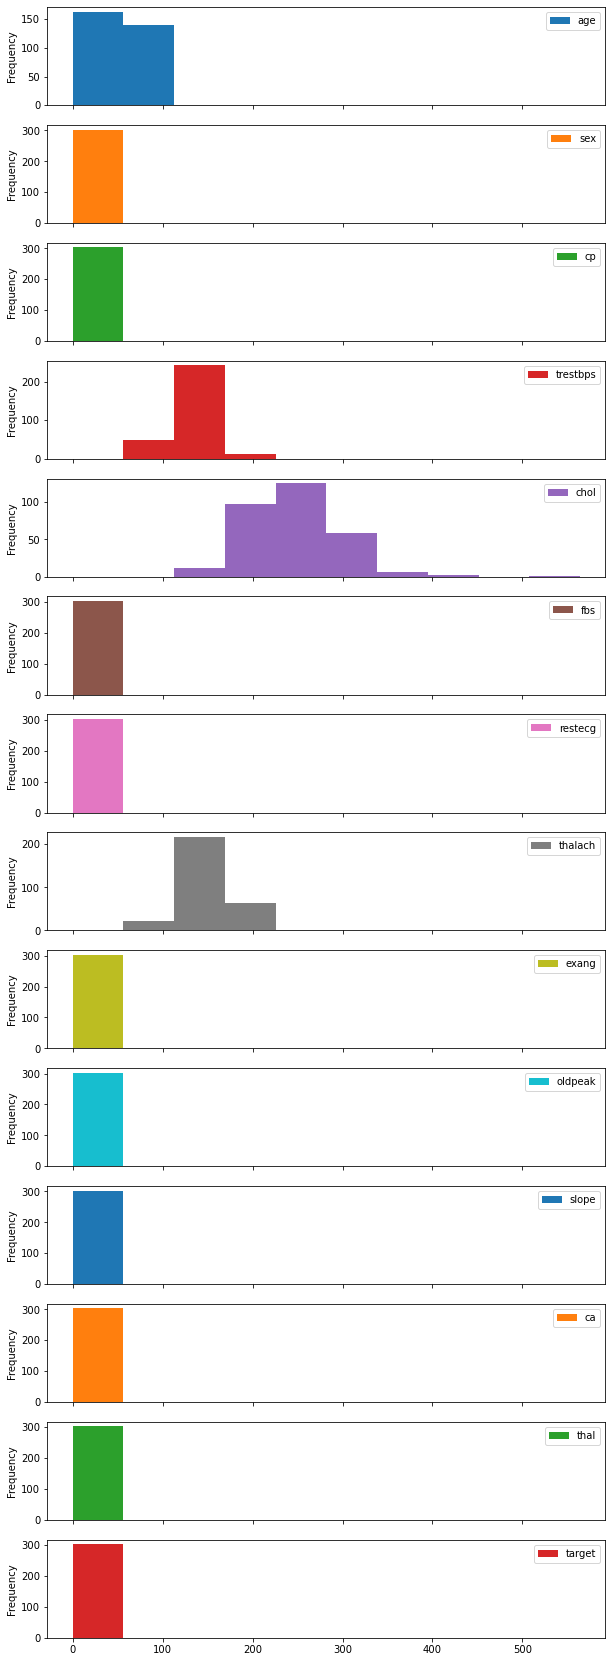

In [27]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

In [28]:
plt.style.available


['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

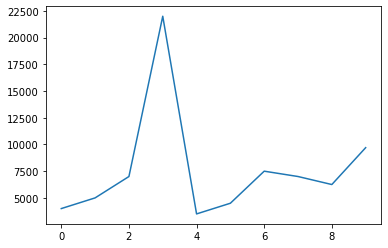

In [29]:
# Plot before changing style
car_sales["Price"].plot();

In [30]:

# Change the style... 
plt.style.use('seaborn-whitegrid')

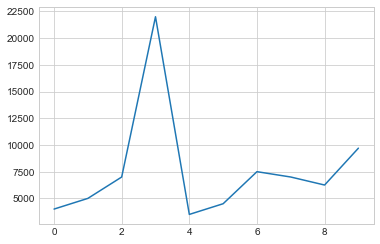

In [31]:
car_sales["Price"].plot();

In [32]:
plt.style.use('seaborn')

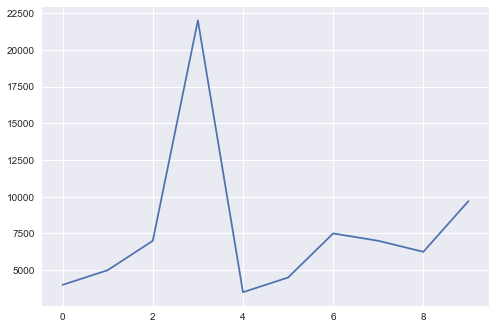

In [33]:
car_sales["Price"].plot();

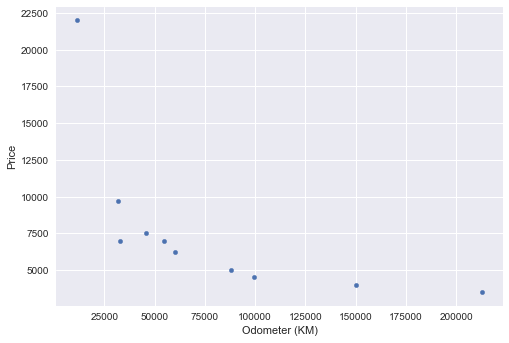

In [34]:

car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [35]:

plt.style.use('ggplot')

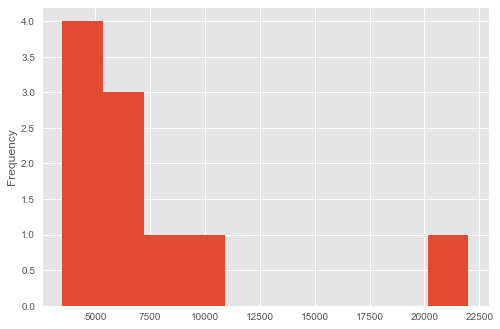

In [36]:

car_sales["Price"].plot.hist();

In [37]:

x = np.random.randn(10, 4)
x

array([[-0.12402965,  0.34844018, -2.53931116, -1.58465113],
       [ 1.21523428, -0.81434128,  1.67025791, -0.52313385],
       [-1.71004424, -1.36400148, -0.95137172,  0.25258133],
       [-0.92932747,  1.20147863,  0.22774832,  0.68037364],
       [ 1.0085264 ,  0.12596027, -1.39579267, -1.13342985],
       [-0.27827818, -0.49399556, -2.5799427 ,  1.23408281],
       [-0.57204714,  1.54612196, -0.67214879, -0.75609448],
       [-1.35946048, -0.67458405, -0.16436541, -2.20102728],
       [-1.65069704, -0.14594915, -0.7191063 , -1.41699418],
       [-1.72819779,  1.23125983, -0.51605598,  1.35066863]])

In [38]:
df = pd.DataFrame(x, columns=['a', 'b', 'c', 'd'])
df

,a,b,c,d
0,-0.124030,0.348440,-2.539311,-1.584651
1,1.215234,-0.814341,1.670258,-0.523134
2,-1.710044,-1.364001,-0.951372,0.252581
3,-0.929327,1.201479,0.227748,0.680374
4,1.008526,0.125960,-1.395793,-1.133430
5,-0.278278,-0.493996,-2.579943,1.234083
6,-0.572047,1.546122,-0.672149,-0.756094
7,-1.359460,-0.674584,-0.164365,-2.201027
8,-1.650697,-0.145949,-0.719106,-1.416994
9,-1.728198,1.231260,-0.516056,1.350669


matplotlib.axes._subplots.AxesSubplot

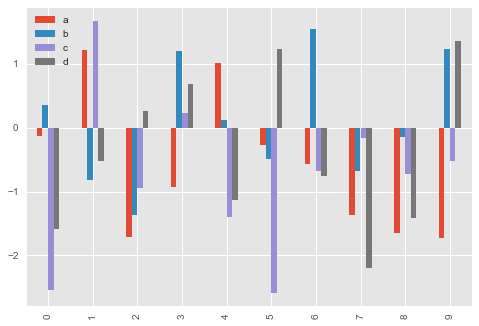

In [39]:
ax = df.plot(kind='bar')
type(ax)

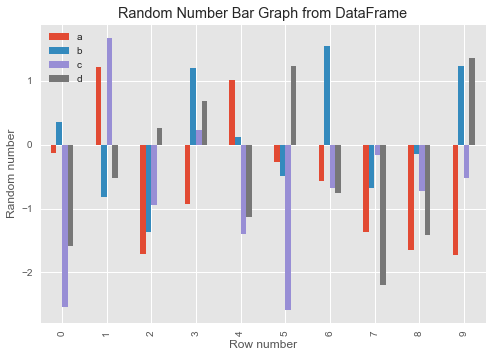

In [40]:
ax = df.plot(kind='bar')
ax.set(title="Random Number Bar Graph from DataFrame", 
       xlabel="Row number", 
       ylabel="Random number")
ax.legend().set_visible(True)